In [61]:
import matplotlib.pyplot as plt
from models import SciNet
import numpy as np
import torch

In [62]:
scinet = SciNet(49,1,3,64)
scinet.load_state_dict(torch.load("trained_models/scinet1.dat"))

size = 100
neuron_activation = [np.zeros((size,size)),np.zeros((size,size)),np.zeros((size,size))]

t_max = 5
t = np.linspace(0, t_max, size)
min_fr, max_fr = 0, 5
fr = np.random.normal(min_fr, max_fr, size)
start_st, end_st = 0.01, 100
st = np.logspace(np.log10(start_st), np.log10(end_st), size, endpoint = True)

def f(t, st, fr):
    return st**2 * fr * (1 - t/st - np.exp(-t/st))

for ist, st_ in enumerate(st):
    for ifr, fr_ in enumerate(fr):
        example = list(f(t, st_, fr_))[1:50]
        t_pred = np.random.uniform(0, t_max)
        example.append(t_pred)

        example_tensor = torch.Tensor([example]).reshape(1, -1)
        results = scinet.forward(example_tensor)

        latent_layer = scinet.mu.detach().numpy()[0]

        neuron_activation[0][ist, ifr] = latent_layer[0]
        neuron_activation[1][ist, ifr] = latent_layer[1]
        neuron_activation[2][ist, ifr] = latent_layer[2]

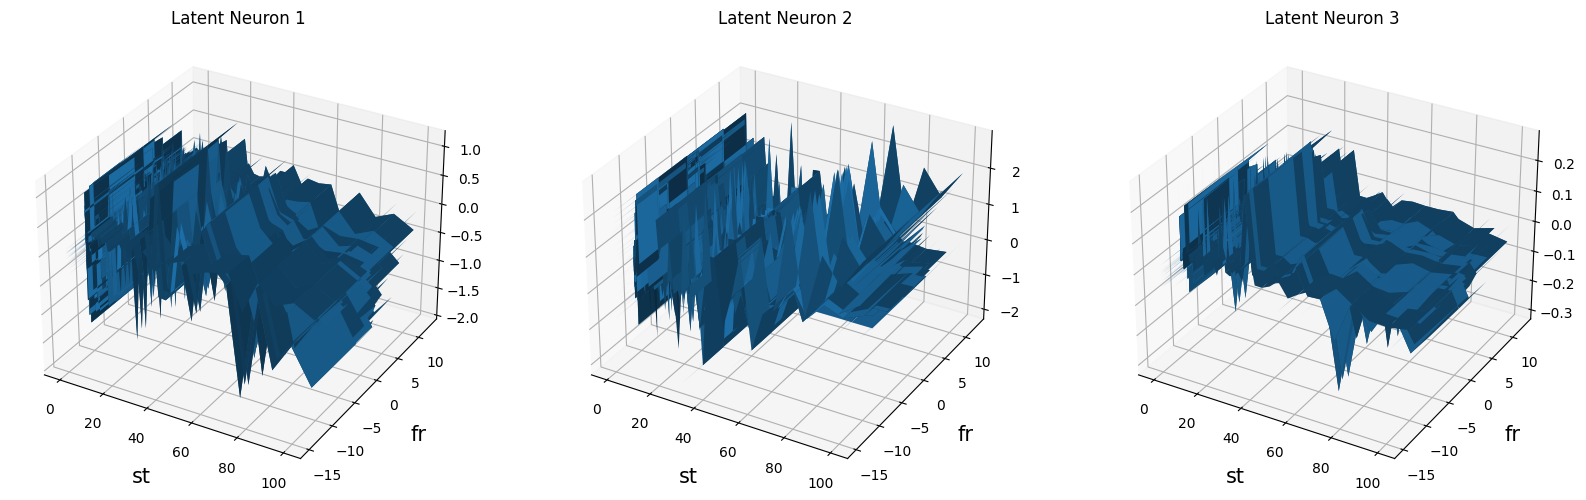

In [63]:
fig = plt.figure(figsize=(20,10))
for i in range(3):
    ax = fig.add_subplot(1, 3, 1+i, projection='3d')
    
    X,Y = np.meshgrid(st, fr)
    Z = neuron_activation[i]

    surf = ax.plot_surface(X, Y, Z, cmap=None, linewidth=0, antialiased=True)
    ax.set_xlabel('st', fontsize=15, labelpad=10)
    ax.set_ylabel('fr', fontsize=15, labelpad=10)
    ax.set_title("Latent Neuron %i" % (i+1))

plt.show()